In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('canada_per_capita_income.csv')
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [10]:
df.shape
df.keys()

Index(['year', 'per capita income (US$)'], dtype='object')

In [12]:
df.columns=['year','income']
df
df.columns

Index(['year', 'income'], dtype='object')

In [16]:
x=df.year
y=df.income
x

0     1970
1     1971
2     1972
3     1973
4     1974
5     1975
6     1976
7     1977
8     1978
9     1979
10    1980
11    1981
12    1982
13    1983
14    1984
15    1985
16    1986
17    1987
18    1988
19    1989
20    1990
21    1991
22    1992
23    1993
24    1994
25    1995
26    1996
27    1997
28    1998
29    1999
30    2000
31    2001
32    2002
33    2003
34    2004
35    2005
36    2006
37    2007
38    2008
39    2009
40    2010
41    2011
42    2012
43    2013
44    2014
45    2015
46    2016
Name: year, dtype: int64

In [17]:
y=df.income
y

0      3399.299037
1      3768.297935
2      4251.175484
3      4804.463248
4      5576.514583
5      5998.144346
6      7062.131392
7      7100.126170
8      7247.967035
9      7602.912681
10     8355.968120
11     9434.390652
12     9619.438377
13    10416.536590
14    10790.328720
15    11018.955850
16    11482.891530
17    12974.806620
18    15080.283450
19    16426.725480
20    16838.673200
21    17266.097690
22    16412.083090
23    15875.586730
24    15755.820270
25    16369.317250
26    16699.826680
27    17310.757750
28    16622.671870
29    17581.024140
30    18987.382410
31    18601.397240
32    19232.175560
33    22739.426280
34    25719.147150
35    29198.055690
36    32738.262900
37    36144.481220
38    37446.486090
39    32755.176820
40    38420.522890
41    42334.711210
42    42665.255970
43    42676.468370
44    41039.893600
45    35175.188980
46    34229.193630
Name: income, dtype: float64

In [18]:
x.values

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016])

In [19]:
y.values

array([ 3399.299037,  3768.297935,  4251.175484,  4804.463248,
        5576.514583,  5998.144346,  7062.131392,  7100.12617 ,
        7247.967035,  7602.912681,  8355.96812 ,  9434.390652,
        9619.438377, 10416.53659 , 10790.32872 , 11018.95585 ,
       11482.89153 , 12974.80662 , 15080.28345 , 16426.72548 ,
       16838.6732  , 17266.09769 , 16412.08309 , 15875.58673 ,
       15755.82027 , 16369.31725 , 16699.82668 , 17310.75775 ,
       16622.67187 , 17581.02414 , 18987.38241 , 18601.39724 ,
       19232.17556 , 22739.42628 , 25719.14715 , 29198.05569 ,
       32738.2629  , 36144.48122 , 37446.48609 , 32755.17682 ,
       38420.52289 , 42334.71121 , 42665.25597 , 42676.46837 ,
       41039.8936  , 35175.18898 , 34229.19363 ])

In [21]:
x=df.iloc[:,0:1].values # converting x and y into 2d array
y=df.iloc[:,1].values
x
y

array([ 3399.299037,  3768.297935,  4251.175484,  4804.463248,
        5576.514583,  5998.144346,  7062.131392,  7100.12617 ,
        7247.967035,  7602.912681,  8355.96812 ,  9434.390652,
        9619.438377, 10416.53659 , 10790.32872 , 11018.95585 ,
       11482.89153 , 12974.80662 , 15080.28345 , 16426.72548 ,
       16838.6732  , 17266.09769 , 16412.08309 , 15875.58673 ,
       15755.82027 , 16369.31725 , 16699.82668 , 17310.75775 ,
       16622.67187 , 17581.02414 , 18987.38241 , 18601.39724 ,
       19232.17556 , 22739.42628 , 25719.14715 , 29198.05569 ,
       32738.2629  , 36144.48122 , 37446.48609 , 32755.17682 ,
       38420.52289 , 42334.71121 , 42665.25597 , 42676.46837 ,
       41039.8936  , 35175.18898 , 34229.19363 ])

In [22]:
from sklearn.linear_model import LinearRegression # use the supervised machine learning algorithm

In [ ]:
model=LinearRegression() #train the model
model.fit(x,y) # fitting the model to test new values


In [26]:
m=model.coef_
m

array([828.46507522])

In [ ]:
c=model.intercept_
c

In [ ]:
y=(m*x)+c
y

In [28]:
y_predict=model.predict(x) #ready for prediction
y_predict

array([ -134.55966672,   693.9054085 ,  1522.37048373,  2350.83555895,
        3179.30063417,  4007.7657094 ,  4836.23078462,  5664.69585984,
        6493.16093506,  7321.62601029,  8150.09108551,  8978.55616073,
        9807.02123595, 10635.48631118, 11463.9513864 , 12292.41646162,
       13120.88153685, 13949.34661207, 14777.81168729, 15606.27676251,
       16434.74183774, 17263.20691296, 18091.67198818, 18920.1370634 ,
       19748.60213863, 20577.06721385, 21405.53228907, 22233.9973643 ,
       23062.46243952, 23890.92751474, 24719.39258996, 25547.85766519,
       26376.32274041, 27204.78781563, 28033.25289085, 28861.71796608,
       29690.1830413 , 30518.64811652, 31347.11319175, 32175.57826697,
       33004.04334219, 33832.50841741, 34660.97349264, 35489.43856786,
       36317.90364308, 37146.3687183 , 37974.83379353])

In [33]:
#start prediction
new_year=2020
new_income=model.predict([[new_year]])
new_income

array([41288.69409442])

<function matplotlib.pyplot.show>

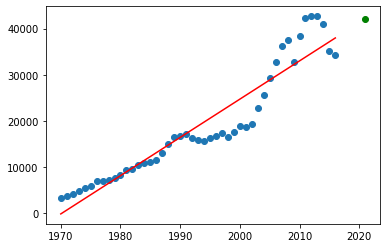

In [32]:
plt.scatter(x,y)
plt.scatter([new_year],new_income,color="green")
plt.plot(x,y_predict,color="red")
plt.show